In [ ]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import csv
import gmaps

In [3]:
from api_key import gmap_api_key
from ipywidgets.embed import embed_minimal_html

In [4]:
epa_CA = pd.read_csv("Final_Solution/epa_hap_ca_with_dates_split_final250AM.csv")

In [5]:
epa_CA['first_max_value_in_NG'].agg(['mean','median','std', 'max','min'])

mean         2.094049
median       0.200000
std         13.074766
max       9051.100000
min          0.000000
Name: first_max_value_in_NG, dtype: float64

In [9]:
# Non Carbon 
epa_CA_Non_Carbon = epa_CA.loc[(epa_CA["units_of_measure"] != "Parts per billion Carbon")]
epa_CA_Non_Carbon

,latitude,longitude,parameter_name,sample_duration,date_local,units_of_measure,arithmetic_mean,first_max_value,first_max_hour,state_name,county_name,city_name,date_of_last_change,first_max_value_in_NG,month,day,year
0,40.539990,-121.576460,Nickel PM2.5 LC,24 HOUR,2001-08-02,Micrograms/cubic meter (LC),0.00013,0.00013,0,California,Shasta,Not in a city,7/22/2015,0.13,8,2,2001
1,34.733889,-120.008349,Lead PM2.5 LC,24 HOUR,2015-08-04,Micrograms/cubic meter (LC),0.00000,0.00000,0,California,Santa Barbara,Not in a city,8/30/2016,0.00,8,4,2015
2,37.950741,-121.268523,Chromium (TSP) STP,24 HOUR,1992-10-03,Micrograms/cubic meter (25 C),0.00300,0.00300,0,California,San Joaquin,Stockton,6/11/2013,3.00,10,3,1992
4,34.069570,-116.388930,Nickel PM2.5 LC,24 HOUR,2006-12-04,Micrograms/cubic meter (LC),0.00000,0.00000,0,California,San Bernardino,Not in a city,11/17/2015,0.00,12,4,2006
6,37.713250,-119.706200,Nickel PM2.5 LC,24 HOUR,2009-11-30,Micrograms/cubic meter (LC),0.00000,0.00000,0,California,Mariposa,Not in a city,8/11/2015,0.00,11,30,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872455,41.561111,-124.082778,Arsenic PM2.5 LC,24 HOUR,1990-11-07,Micrograms/cubic meter (LC),0.00022,0.00022,0,California,Del Norte,Redwood National Park,7/22/2015,0.22,11,7,1990
872456,36.781333,-119.773190,Chromium PM2.5 LC,24 HOUR,2010-04-20,Micrograms/cubic meter (LC),0.00000,0.00000,0,California,Fresno,Fresno,7/28/2015,0.00,4,20,2010
872457,41.711825,-121.509993,Chromium PM2.5 LC,24 HOUR,2010-03-03,Micrograms/cubic meter (LC),0.00000,0.00000,0,California,Siskiyou,Lava Beds National Monument,7/28/2015,0.00,3,3,2010
872458,38.102507,-122.237976,Lead PM2.5 LC,24 HOUR,2014-05-11,Micrograms/cubic meter (LC),0.00000,0.00000,0,California,Solano,Vallejo,4/6/2015,0.00,5,11,2014


In [7]:
# 279502 

In [8]:
epa_CA_Non_Carbon['first_max_value_in_NG'].agg(['mean','median','std', 'max','min'])

mean         2.740759
median       1.000000
std         11.348834
max       1112.300000
min          0.000000
Name: first_max_value_in_NG, dtype: float64

In [11]:
# Carbon 
epa_CA_Carbon = epa_CA.loc[(epa_CA["units_of_measure"] == "Parts per billion Carbon")]
epa_CA_Carbon

,latitude,longitude,parameter_name,sample_duration,date_local,units_of_measure,arithmetic_mean,first_max_value,first_max_hour,state_name,county_name,city_name,date_of_last_change,first_max_value_in_NG,month,day,year
3,37.765946,-122.399044,Tetrachloroethylene,24 HOUR,1998-09-14,Parts per billion Carbon,1.900000,1.9000,0,California,San Francisco,San Francisco,6/11/2013,1.9000,9,14,1998
5,37.535833,-121.961823,Vinyl chloride,24 HOUR,1991-12-08,Parts per billion Carbon,0.000000,0.0000,0,California,Alameda,Fremont,6/11/2013,0.0000,12,8,1991
7,32.676186,-115.484144,13-Butadiene,24 HOUR,2011-10-18,Parts per billion Carbon,0.520000,0.5200,0,California,Imperial,Calexico,6/10/2013,0.5200,10,18,2011
9,37.687526,-121.784217,Benzene,1 HOUR,2012-10-26,Parts per billion Carbon,1.799496,4.1991,23,California,Alameda,Livermore,7/18/2014,4.1991,10,26,2012
10,38.636944,-121.513333,Formaldehyde,3 HOURS,2000-07-29,Parts per billion Carbon,3.300000,3.3000,5,California,Sacramento,Sacramento,6/11/2013,3.3000,7,29,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872437,34.276362,-118.683757,Carbon tetrachloride,24 HOUR,2010-07-31,Parts per billion Carbon,0.100000,0.1000,0,California,Ventura,Simi Valley,6/10/2013,0.1000,7,31,2010
872438,37.765946,-122.399044,Trichloroethylene,24 HOUR,1997-12-24,Parts per billion Carbon,0.000000,0.0000,0,California,San Francisco,San Francisco,6/11/2013,0.0000,12,24,1997
872447,34.276362,-118.683757,Chloroform,24 HOUR,2008-05-06,Parts per billion Carbon,0.030000,0.0300,0,California,Ventura,Simi Valley,6/11/2013,0.0300,5,6,2008
872454,32.631231,-117.059075,trans-13-Dichloropropene,24 HOUR,2012-08-25,Parts per billion Carbon,0.150000,0.1500,0,California,San Diego,Chula Vista,6/10/2013,0.1500,8,25,2012


In [9]:
# 297721 

In [10]:
epa_CA_Carbon['first_max_value_in_NG']

3         1.9000
5         0.0000
7         0.5200
9         4.1991
10        3.3000
           ...  
872437    0.1000
872438    0.0000
872447    0.0300
872454    0.1500
872460    2.5200
Name: first_max_value_in_NG, Length: 392727, dtype: float64

In [11]:
epa_CA_Carbon['first_max_value'].agg(['mean','median','std', 'max','min'])

mean         1.304063
median       0.120000
std         14.876403
max       9051.100000
min          0.000000
Name: first_max_value, dtype: float64

#### Plot 1.1 : Get Average NON CARBON HAP for CA for all years 
#### Plot 1.2 : Get Average CARBON HAP for CA for all years 

In [12]:
# Get all years
get_unique_years = epa_CA_Carbon["year"].unique()
plot_years = sorted(list(get_unique_years))

In [29]:
# Non Carbon HAP level fort the state by year
get_non_carbon_group = (epa_CA_Non_Carbon.groupby("year")["first_max_value_in_NG"].mean()).to_frame()
#get_non_carbon_group

# Carbon HAP level for the state by year
get_carbon_group = (epa_CA_Carbon.groupby("year")["first_max_value_in_NG"].mean()).to_frame()
get_non_carbon_group.head(2)

,first_max_value_in_NG
year,
1990,3.989208
1991,3.515324


#### Plot 1.1: Get Average NON CARBON HAP for CA for all years 

In [14]:
years_count = len(get_non_carbon_group)

# Plot variables
x_axis = get_non_carbon_group.index
y_axis = get_non_carbon_group["first_max_value_in_NG"]

x_label  ="YEARS"
y_label  ="HAP Levels (Nanograms)"
graph_title   ="Average (Non Carbon) HAP in the state of CA between 1990 and 2017"

x_ticks = np.arange(years_count)
tick_angle = 90

fsize = (16,4)
# using matplotlib colormap
bar_color = cm.Oranges_r(np.linspace(.4, .8, len(x_axis)))
bar_alpha =0.8
bar_width = 0.40

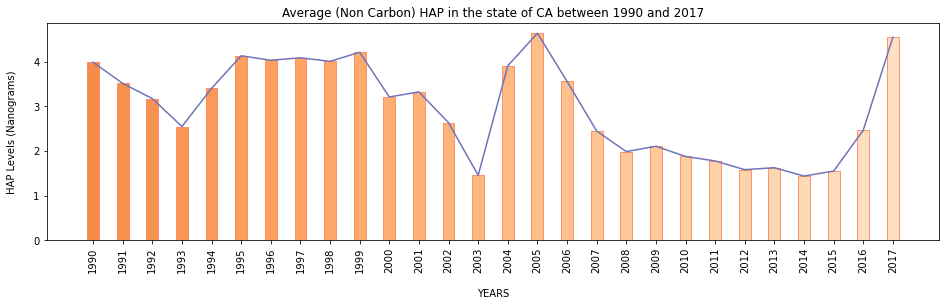

In [15]:
# Plot Size
plt.figure(figsize=fsize)

# plotting bar chart using matplotlib.pyplot
plt.bar(x_axis, y_axis, width=bar_width, color=bar_color, alpha=bar_alpha, align="center", edgecolor="coral")
plt.plot(get_non_carbon_group.index,get_non_carbon_group['first_max_value_in_NG'],color="#6f73b8")

# x and y lims
# plt.xlim(x_lim)
# plt.ylim(y_lim)

# labels and title
plt.xlabel(x_label, labelpad=16)
plt.ylabel(y_label, labelpad=16)
plt.title(graph_title)

# Ticks
plt.xticks(x_axis,rotation=tick_angle)

# Display
plt.savefig("plot_images/Non_Carbon_HAP_Yearly.jpeg")
plt.show()

#### Plot 1.2 : Get Average CARBON HAP for CA for all years 

In [24]:
years_count = len(get_carbon_group)

# Plot variables
x_axis = get_carbon_group.index
y_axis = get_carbon_group["first_max_value_in_NG"]

x_label  ="YEARS"
y_label  ="HAP Levels (Parts per billion Carbon)"
graph_title   ="Average Carbon HAP in the state of CA between 1990 and 2017"

x_ticks = np.arange(years_count)
tick_angle = 90

fsize = (16,4)
# using matplotlib colormap
bar_color = cm.bone(np.linspace(.4, .8,len(x_axis)))
#bar_color = "#473A48"
bar_alpha =0.6
bar_width = 0.40

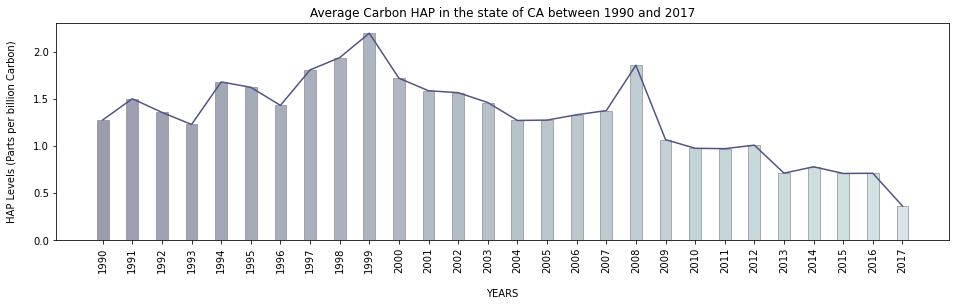

In [26]:
# Plot Size
plt.figure(figsize=fsize)

# plotting bar chart using matplotlib.pyplot
plt.bar(x_axis, y_axis, width=bar_width, color=bar_color, alpha=bar_alpha, align="center", edgecolor="grey")
plt.plot(get_carbon_group.index,get_carbon_group['first_max_value_in_NG'],color="#505385")

# x and y lims
# plt.xlim(x_lim)
# plt.ylim(y_lim)

# labels and title
plt.xlabel(x_label, labelpad=16)
plt.ylabel(y_label, labelpad=16)
plt.title(graph_title)

# Ticks
plt.xticks(x_axis,rotation=tick_angle)

# Display
plt.savefig("plot_images/Carbon_HAP_Yearly.jpeg")

plt.show()

#### Plot 2.1 : Get Average NON CARBON HAP for CA for select years  [1990,1993,2003,2005,2008, 2017]
#### Plot 2.2 : Get Average CARBON HAP for CA for select years [1990, 1993, 1999, 2008, 2013, 2017]

#### Plot 2.1 : Get Average NON CARBON HAP for CA for select years  [1990,1993,2003,2005,2008, 2017]

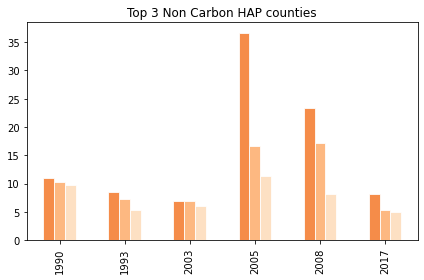

In [18]:
list_of_analysis_years_NC = [1990,1993,2003,2005,2008,2017]
df_list  = []
cols     = ['Counties']
i = 0

bar_alpha = 0.8
bar_width = 0.5

for year in list_of_analysis_years_NC:
    county_list_NC = epa_CA_Non_Carbon.loc[epa_CA_Non_Carbon["year"] == year]
    county_list_NC = county_list_NC.groupby(["county_name"])["first_max_value_in_NG"].mean()
    county_list_NC = county_list_NC.reset_index()
    county_list_NC = county_list_NC.sort_values(by=["first_max_value_in_NG","county_name"], ascending=False)
    
    top_3_county_list_NC = pd.DataFrame(county_list_NC.head(3))
    df_list.append([year])
    
    
    for ind, row in top_3_county_list_NC.iterrows():
        bar_color = cm.Oranges_r(np.linspace(.4, .8, 3))    
        
        df_list[i].append(row["first_max_value_in_NG"])
        cols.append(row["county_name"])
        
    i = i + 1    

# print(df_list)
# print(cols)
df = pd.DataFrame(df_list,columns=['', 'county 1', 'county 2', 'county 3'])

# plot grouped bar chart
df.plot(x='',
    kind='bar',
    stacked=False,
    title='Top 3 Non Carbon HAP counties',
    legend = None,
    color = bar_color,
    alpha = bar_alpha,
    width = bar_width,
    edgecolor="white")

plt.tight_layout()
plt.savefig("plot_images/Top3_Non_Carbon_HAP_Counties.jpeg")    
plt.show()        

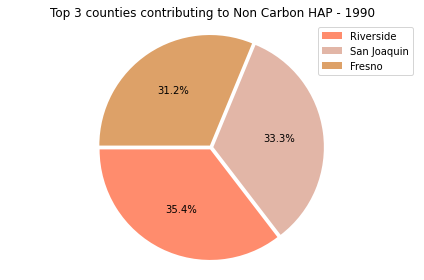

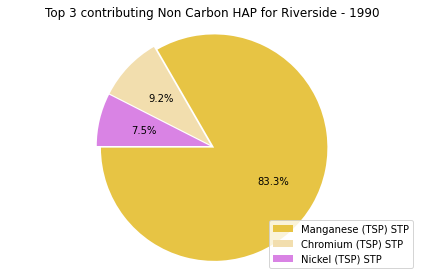

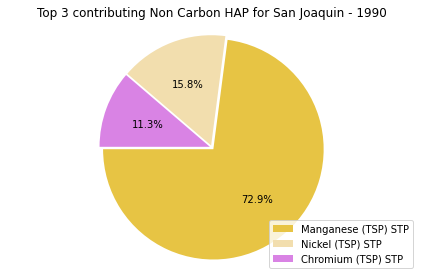

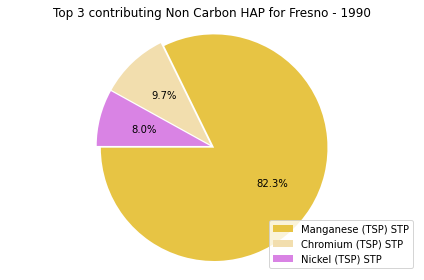

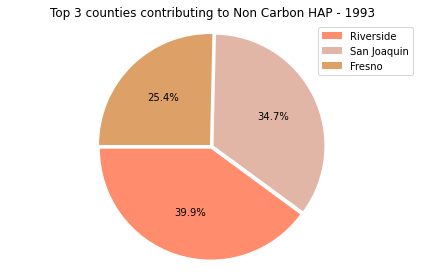

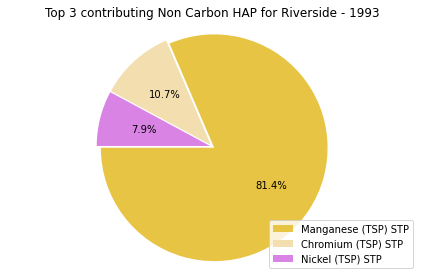

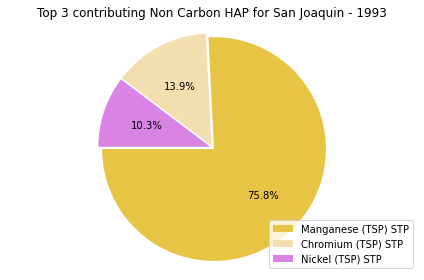

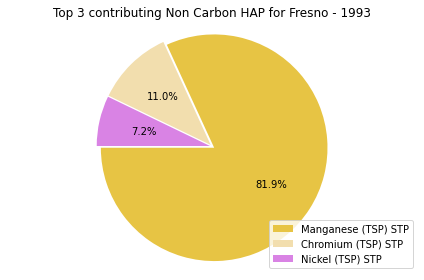

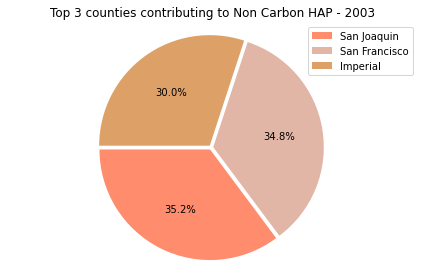

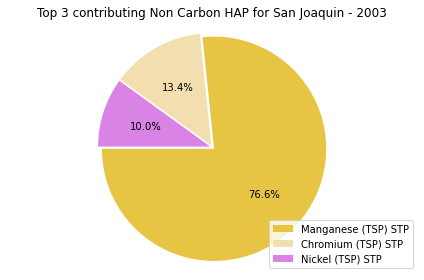

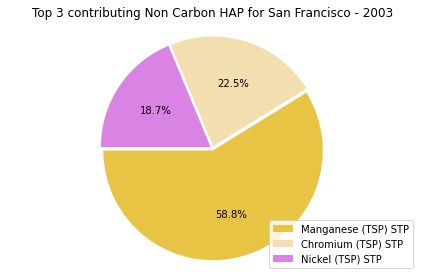

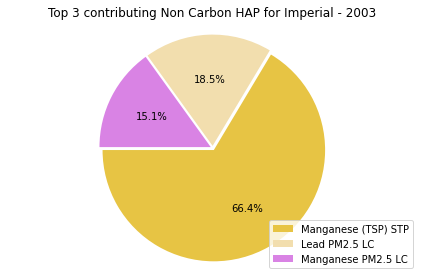

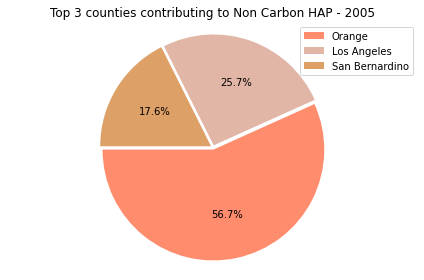

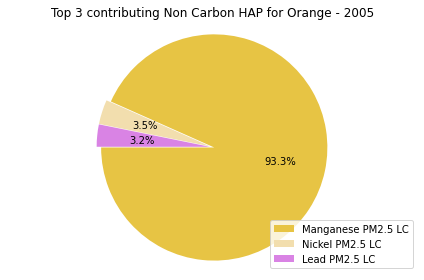

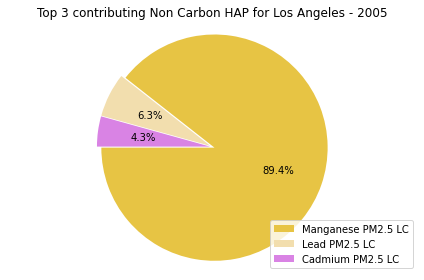

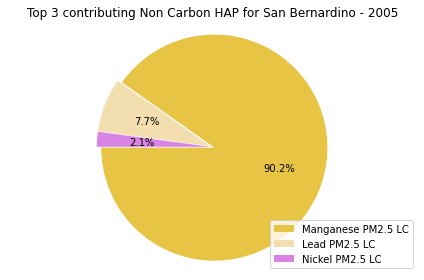

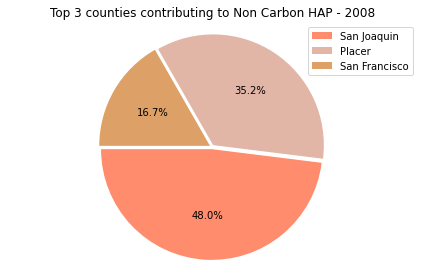

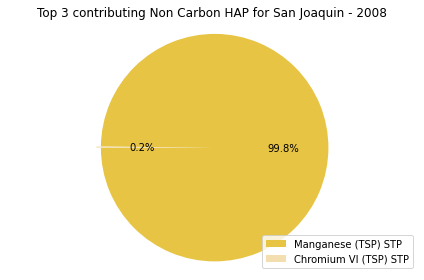

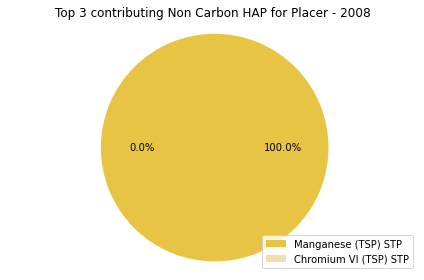

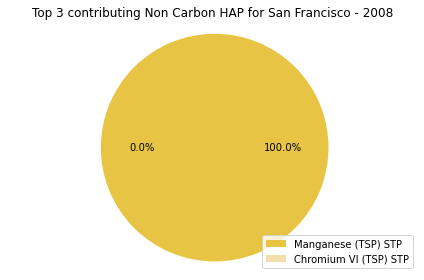

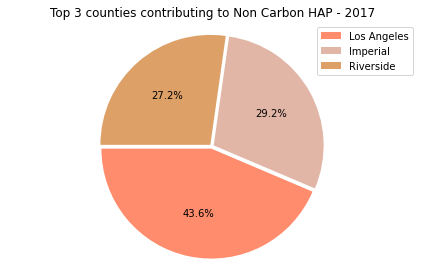

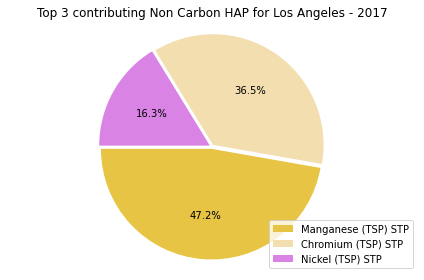

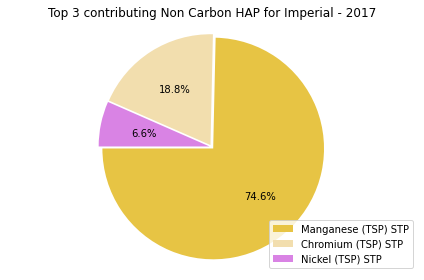

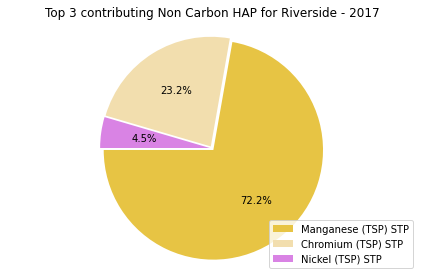

In [19]:
#### Keeping code seperated helps our team to share code and work in groups. 
#### also helps in running code to generate plots independently 
for year in list_of_analysis_years_NC:

    county_list_NC = epa_CA_Non_Carbon.loc[epa_CA_Non_Carbon["year"] == year]
    county_list_NC = county_list_NC.groupby(["county_name"])["first_max_value_in_NG"].mean()
    county_list_NC = county_list_NC.reset_index()
    county_list_NC = county_list_NC.sort_values(by=["first_max_value_in_NG","county_name"], ascending=False)
    
    
    
    ## creating a new data frame for plot
    top_3_county_list_NC = pd.DataFrame(county_list_NC.head(3))

    ### PLot pie chart of top 3 counties
    size = top_3_county_list_NC["first_max_value_in_NG"]
    labels = top_3_county_list_NC["county_name"]
    colors = ["#ff8c6d", "#e2b6a7", "#dda168"]
    explode = (0.02, 0.02, 0.02)
    plt.pie(size, labels=None, explode=explode, colors=colors, autopct="%1.1f%%", startangle=180)
    plt.title("Top 3 counties contributing to Non Carbon HAP - " + str(year))
    plt.axis("equal")
    plt.legend(labels,loc="upper right")
    top_NC_counties_image = "plot_images/top_counties_of_year/top_County_NC_"+str(year)+"_pie" + ".jpeg"

    plt.tight_layout()    
    plt.savefig(top_NC_counties_image)
    plt.show()

    # get top 3 Pollutants for each county
    # Top 3 Non Carbon HAP for each of the top 3 county for 1999
    colors = ["#e7c444", "#f2deae", "#d983e4"]
    i = 1
    for ind, row in top_3_county_list_NC.iterrows():
    #top_NC_HAP_image = "plot_images/top_C_pie_" + str(i) + ".jpeg"
        c_name = row["county_name"]
        HAP_list_NC_For_County = epa_CA_Non_Carbon.loc[(epa_CA_Non_Carbon["year"] == year) & (epa_CA_Non_Carbon["county_name"] == c_name)]
        HAP_list_NC_For_County = pd.DataFrame(HAP_list_NC_For_County.groupby(["parameter_name"])["first_max_value_in_NG"].mean())
        HAP_list_NC_For_County = HAP_list_NC_For_County.reset_index()
        top_NC_HAP = HAP_list_NC_For_County.sort_values(by=["first_max_value_in_NG"], ascending=False)
        top_NC_HAP = pd.DataFrame(top_NC_HAP.head(3))
        
        if (len(top_NC_HAP)) == 3:
            explode = (0.02, 0.02, 0.02)
        elif (len(top_NC_HAP)) == 2:
            explode = (0.02, 0.02)
        elif (len(top_NC_HAP)) == 1:
            explode = None

        size = top_NC_HAP["first_max_value_in_NG"]
        labels = top_NC_HAP["parameter_name"]
       
        plt.pie(size, colors=colors, autopct="%1.1f%%", startangle=180, explode=explode)
        plt.title("Top 3 contributing Non Carbon HAP for "+ c_name + " - " + str(year))
        plt.axis("equal")
        plt.legend(labels, loc="lower right")
        
        plt.tight_layout()

        top_NC_HAP_image = "plot_images/top_counties_of_year/top_"+str(year)+"_NC_pie_"+c_name + str(i) + ".jpeg"
        plt.savefig(top_NC_HAP_image)
        plt.show()
        i = i + 1







#### Plot 2.2 : Get Average CARBON HAP for CA for select years [1990, 1993, 1999, 2008, 2013, 2017]

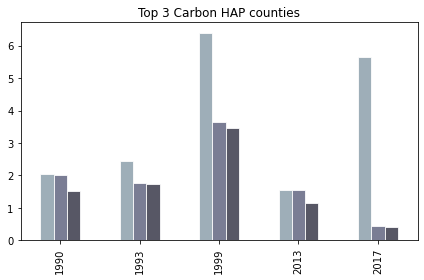

In [12]:
list_of_analysis_years_C = [1990, 1993, 1999,  2013, 2017]
df_list  = []
cols     = ['Counties']
i = 0

bar_alpha = 0.8
bar_width = 0.5


for year in list_of_analysis_years_C:
    county_list_C = epa_CA_Carbon.loc[epa_CA_Carbon["year"] == year]
    county_list_C = county_list_C.groupby(["county_name"])["first_max_value_in_NG"].mean()
    county_list_C = county_list_C.reset_index()
    county_list_C = county_list_C.sort_values(by=["first_max_value_in_NG","county_name"], ascending=False)
    
    top_3_county_list_C = pd.DataFrame(county_list_C.head(3))
    df_list.append([year])
    
    
    for ind, row in top_3_county_list_C.iterrows():
        bar_color = cm.bone_r(np.linspace(.4, .8, 3))    
        
        df_list[i].append(row["first_max_value_in_NG"])
        cols.append(row["county_name"])
        
    i = i + 1    

#print(df_list)
# print(cols)
df = pd.DataFrame(df_list,columns=['', 'county 1', 'county 2', 'county 3'])

# plot grouped bar chart
df.plot(x='',
    kind='bar',
    stacked=False,
    title='Top 3 Carbon HAP counties',
    legend = None,
    color = bar_color,
    alpha = bar_alpha,
    width = bar_width,
    edgecolor="white")

plt.tight_layout()
plt.savefig("plot_images/Top3_Carbon_HAP_Counties.jpeg")    
plt.show()   

In [21]:
# seperate for 2008

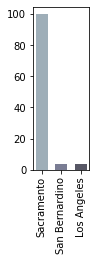

,county_name,first_max_value_in_NG
12,Sacramento,99.600000
13,San Bernardino,3.627798
6,Los Angeles,3.516311


In [22]:
df_list  = []
cols     = ['Counties']
i = 0



county_list_C = epa_CA_Carbon.loc[epa_CA_Carbon["year"] == 2008]
county_list_C = county_list_C.groupby(["county_name"])["first_max_value_in_NG"].mean()
county_list_C = county_list_C.reset_index()
county_list_C = county_list_C.sort_values(by=["first_max_value_in_NG","county_name"], ascending=False)
    
top_3_county_list_C = pd.DataFrame(county_list_C.head(3))


# Plot variables
x_axis = top_3_county_list_C["county_name"]
y_axis = top_3_county_list_C["first_max_value_in_NG"]

x_label  ="Drug Regimen"
y_label  ="Total Timepoints"
graph_title   ="Timepoints for all mice tested for each drug regimen"


x_ticks = np.arange(len(top_3_county_list_C))
tick_angle = 90

# using matplotlib colormap
bar_color = cm.bone_r(np.linspace(.4, .8, 3))
bar_alpha = 0.8
bar_width = 0.6

plt.figure(figsize=(1,3))
plt.bar(x_axis, y_axis, width=bar_width, color=bar_color, alpha=bar_alpha, align="center")

plt.xticks(x_ticks,x_axis,rotation=tick_angle)
plt.savefig("plot_images/Top3_Carbon_HAP_Counties_outlier.jpeg")    
plt.show()   
top_3_county_list_C

#### Creating another for loop to get same plots as pies

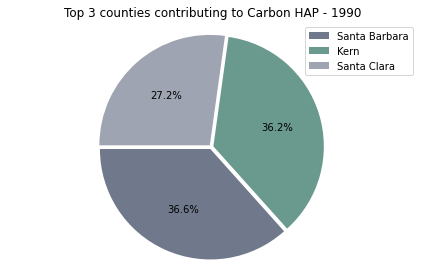

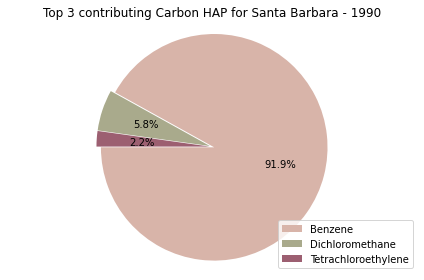

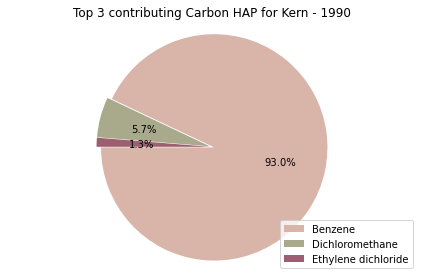

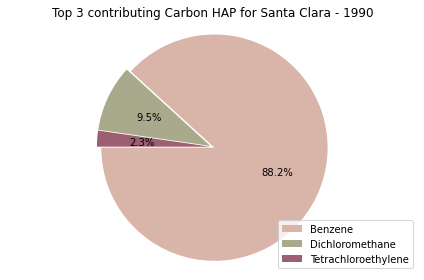

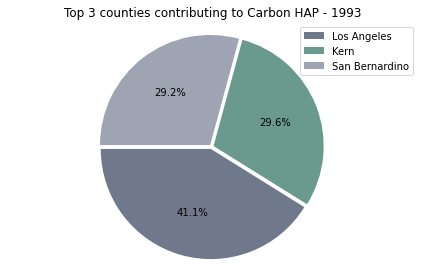

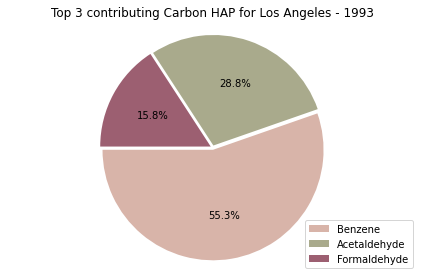

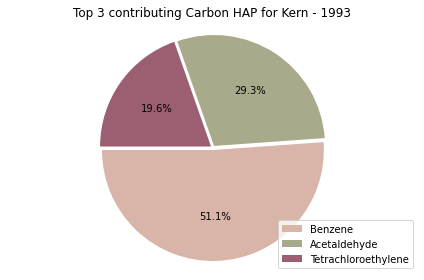

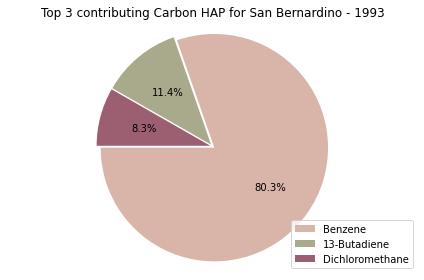

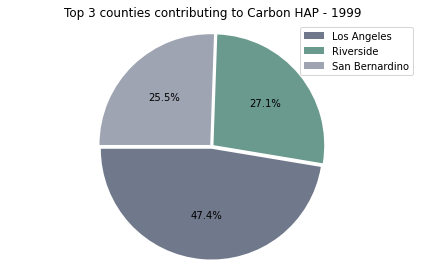

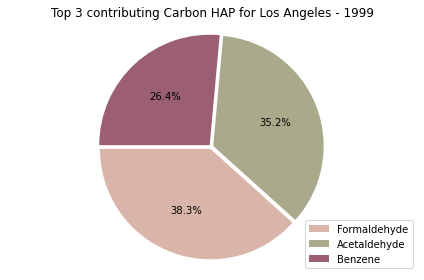

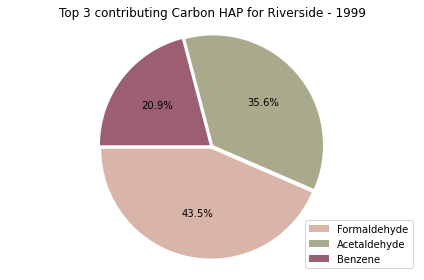

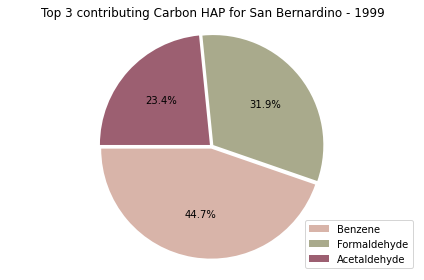

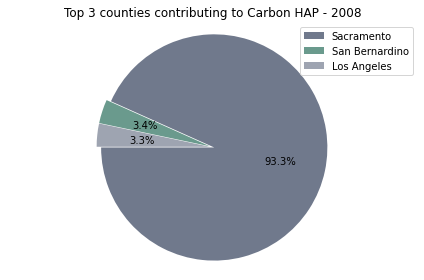

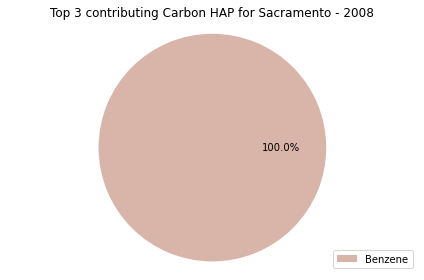

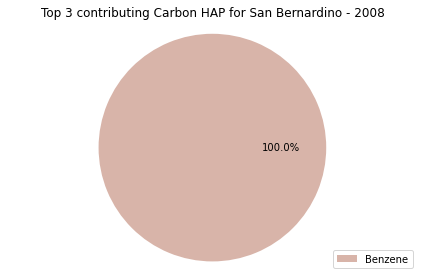

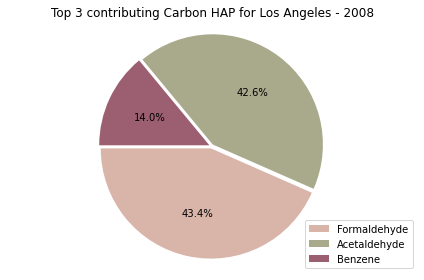

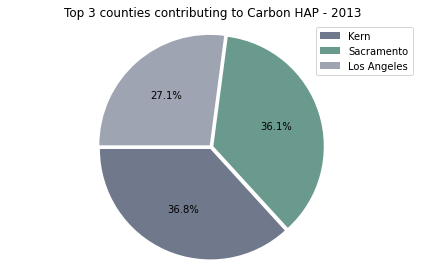

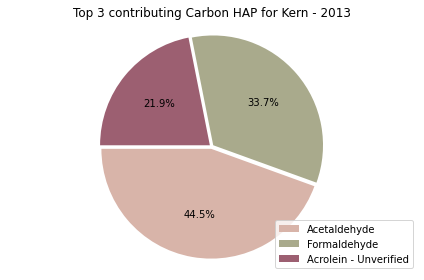

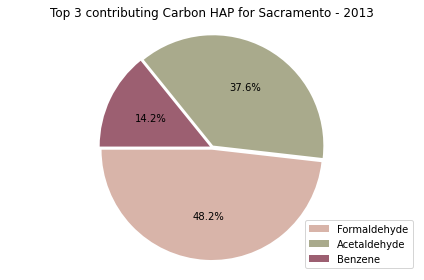

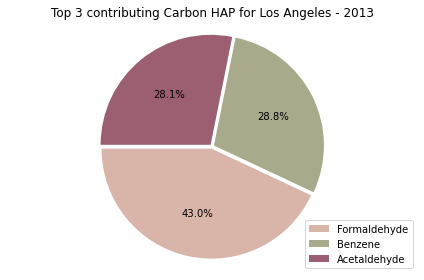

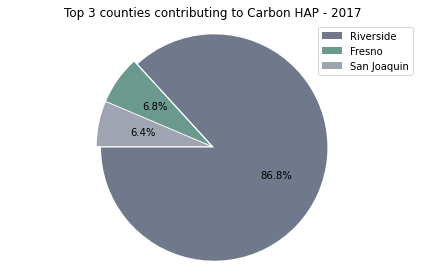

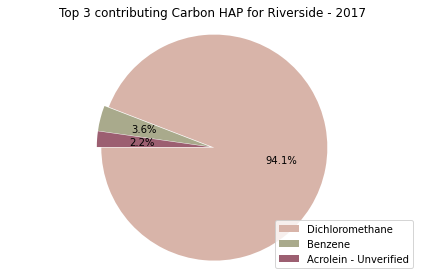

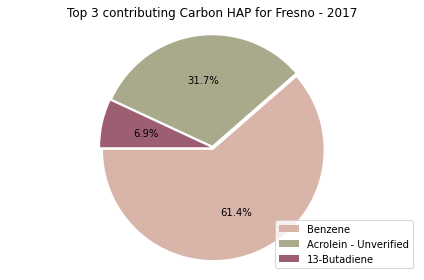

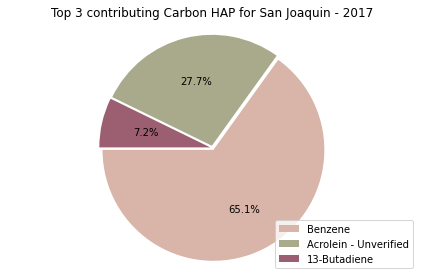

In [23]:
list_of_analysis_years_C = [1990, 1993, 1999, 2008, 2013, 2017]
#### Keeping code seperated helps our team to share code and work in groups. 
#### also helps in running code to generate plots independently 
bar_alpha = 0.8
bar_width = 0.5
for year in list_of_analysis_years_C:
    county_list_C = epa_CA_Carbon.loc[epa_CA_Carbon["year"] == year]
    county_list_C = county_list_C.groupby(["county_name"])["first_max_value_in_NG"].mean()
    county_list_C = county_list_C.reset_index()
    county_list_C = county_list_C.sort_values(by=["first_max_value_in_NG","county_name"], ascending=False)
    


    
    ## creating a new data frame for plot
    top_3_county_list_C = pd.DataFrame(county_list_C.head(3))

    ### PLot pie chart of top 3 counties
    size = top_3_county_list_C["first_max_value_in_NG"]
    labels = top_3_county_list_C["county_name"]
    colors = ["#70798C", "#6a9a8d", "#9EA4B1"]
    explode = (0.02, 0.02, 0.02)
    plt.pie(size, labels=None, explode=explode, colors=colors, autopct="%1.1f%%", startangle=180)
    plt.title("Top 3 counties contributing to Carbon HAP - " + str(year))
    plt.axis("equal")
    plt.legend(labels,loc="upper right")
    top_C_counties_image = "plot_images/top_counties_of_year/top_County_C_"+str(year)+"_pie" + ".jpeg"

    plt.tight_layout()    
    plt.savefig(top_C_counties_image)
    plt.show()

    # get top 3 Pollutants for each county
    # Top 3 Carbon HAP for each of the top 3 county for 1999
    colors = ["#d8b4a9", "#a9aa8c", "#9c5f71"]
    
    i = 1
    for ind, row in top_3_county_list_C.iterrows():
    #top_C_HAP_image = "plot_images/top_C_pie_" + str(i) + ".jpeg"
        c_name = row["county_name"]
        HAP_list_C_For_County = epa_CA_Carbon.loc[(epa_CA_Carbon["year"] == year) & (epa_CA_Carbon["county_name"] == c_name)]
        HAP_list_C_For_County = pd.DataFrame(HAP_list_C_For_County.groupby(["parameter_name"])["first_max_value_in_NG"].mean())
        HAP_list_C_For_County = HAP_list_C_For_County.reset_index()
        top_C_HAP = HAP_list_C_For_County.sort_values(by=["first_max_value_in_NG"], ascending=False)
        top_C_HAP = pd.DataFrame(top_C_HAP.head(3))
        
        if (len(top_C_HAP)) == 3:
            explode = (0.02, 0.02, 0.02)
        elif (len(top_C_HAP)) == 2:
            explode = (0.02, 0.02)
        elif (len(top_C_HAP)) == 1:
            explode = None

        size = top_C_HAP["first_max_value_in_NG"]
        labels = top_C_HAP["parameter_name"]
       
        plt.pie(size, colors=colors, autopct="%1.1f%%", startangle=180, explode=explode)
        plt.title("Top 3 contributing Carbon HAP for "+ c_name + " - " + str(year))
        plt.axis("equal")
        plt.legend(labels, loc="lower right")
        #plt.text(labels,size,'',fontsize=14.0, fontweight='bold')

        
        plt.tight_layout()


        top_C_HAP_image = "plot_images/top_counties_of_year/top_"+str(year)+"_C_pie_"+c_name + str(i) + ".jpeg"
        plt.savefig(top_C_HAP_image)
        plt.show()
        i = i + 1

In [ ]:
# running a loop through dataframes for creating bar charts for five counties for the highest average carbon HAP.

color = cm.bone_r(np.linspace(.4, .8, len(x_axis)))
for year in years:
    imagename = str(year) + "carbontop5" + ".jpeg"
    carbon_counties_chart = carbon_counties.loc[carbon_counties["year"] == year]
    carbon_counties_chart_toptfive = carbon_counties_chart.head(5)
    chart = plt.bar(carbon_counties_chart_toptfive["county_name"],carbon_counties_chart_toptfive["first_max_value_in_NG"], color=color, alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel("County Name")
    plt.ylabel("Average HAP")
    plt.title(f"Counties with highest Avg Carbon HAP reading in {year}")
    plt.rcParams["figure.figsize"] = (5,5)
    plt.savefig(imagename)
        
    plt.show()



    # running a loop through dataframes for creating bar charts for five counties for the lowest average carbon HAP.

for year in years:
    imagename = str(year) + "carbonbottom5" + ".jpeg"
    carbon_counties_chart2 = carbon_counties.loc[carbon_counties["year"] == year]
    carbon_counties_chart_bottomtfive = carbon_counties_chart2.tail(5)
    chart = plt.bar(carbon_counties_chart_bottomtfive["county_name"],carbon_counties_chart_bottomtfive["first_max_value_in_NG"], color=color, alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel("County Name")
    plt.ylabel("Average HAP")
    plt.rcParams["figure.figsize"] = (5,5)
    plt.title(f"Counties with lowest Avg Carbon HAP reading in {year}")
    plt.savefig(imagename)
        
    plt.show()

In [ ]:
# Creating new dataframe for counties with non-carbon HAP

non_carbon_counties = pd.DataFrame(epa_CA_Non_Carbon.groupby(["year","county_name"])["first_max_value_in_NG"].mean())
non_carbon_counties = non_carbon_counties.sort_values(by = ["year", "first_max_value_in_NG"], ascending=[True,False])
non_carbon_counties = non_carbon_counties.reset_index()
non_carbon_counties

In [ ]:
# running a loop through dataframes for creating bar charts for five counties for the highest average non-carbon HAP.

color2 = cm.Oranges_r(np.linspace(.4, .8, len(x_axis)))

for year in years:
    imagename = str(year) + "noncarbontop5" + ".jpeg"
    non_carbon_counties_chart = non_carbon_counties.loc[non_carbon_counties["year"] == year]
    non_carbon_counties_chart_toptfive = non_carbon_counties_chart.head(5)
    chart = plt.bar(non_carbon_counties_chart_toptfive["county_name"],non_carbon_counties_chart_toptfive["first_max_value_in_NG"], color=color2, alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel("County Name")
    plt.ylabel("Average HAP")
    plt.title(f"Counties with highest Avg Non-Carbon HAP reading in {year}")
    plt.rcParams["figure.figsize"] = (5,5)
    plt.savefig(imagename)
    
    plt.show()

In [ ]:
# running a loop through dataframes for creating bar charts for five counties for the lowest average non-carbon HAP.

for year in years:
    imagename = str(year) + "noncarbontbottom5" + ".jpeg"
    non_carbon_counties_chart = non_carbon_counties.loc[non_carbon_counties["year"] == year]
    non_carbon_counties_chart_toptfive = non_carbon_counties_chart.tail(5)
    chart = plt.bar(non_carbon_counties_chart_toptfive["county_name"],non_carbon_counties_chart_toptfive["first_max_value_in_NG"], color=color2, alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel("County Name")
    plt.ylabel("Average HAP")
    plt.title(f"Counties with lowest Avg Non-Carbon HAP reading in {year}")
    plt.rcParams["figure.figsize"] = (5,5)
    plt.savefig(imagename)
        
    plt.show()

In [ ]:
gmaps.configure(api_key=gmap_api_key)

In [ ]:
csv_file = os.path.join(os.getcwd(),'Epa_HAP_DlySumm_CA_newNames_Nano.csv')
csv_file_df = pd.read_csv(csv_file)

In [ ]:
csv2 = os.path.join(os.getcwd(), 'archive', 'epa_hap_ca_with_dates_split.csv')
csv2_df = pd.read_csv(csv2)
csv2_df

In [ ]:
p3 = pd.DataFrame(csv2_df)

In [ ]:
p3_non_carbon = p3.loc[p3['units_of_measure']!="Parts per billion Carbon"]
p3_carbon = p3.loc[p3['units_of_measure']=="Parts per billion Carbon"]

In [ ]:
p3_non_carbon = p3_non_carbon.loc[p3_non_carbon['year']==1990]
p3_carbon = p3_carbon.loc[p3_carbon['year']==1990]

In [ ]:
p3_carbon = p3_carbon.groupby(['county_name', 'latitude', 'longitude']).mean()['first_max_value']
# counties_recent_C=(counties_recent_C.groupby(["county_name","latitude","longitude"])["first_max_value_in_NG"].mean()).to_frame()
# counties_recent_C=pd.DataFrame(counties_recent_C.sort_values("first_max_value_in_NG")).reset_index()
# counties_recent_C = counties_recent_C.sort_values("county_name")
p3_carbon = pd.DataFrame(p3_carbon).reset_index()

In [ ]:
p3_non_carbon = p3_non_carbon.groupby(['county_name', 'latitude', 'longitude']).mean()['first_max_value_in_NG']
# counties_recent_C=(counties_recent_C.groupby(["county_name","latitude","longitude"])["first_max_value_in_NG"].mean()).to_frame()
# counties_recent_C=pd.DataFrame(counties_recent_C.sort_values("first_max_value_in_NG")).reset_index()
# counties_recent_C = counties_recent_C.sort_values("county_name")
p3_non_carbon = pd.DataFrame(p3_non_carbon).reset_index()

In [ ]:
marker_locations = p3_non_carbon[['latitude', 'longitude']]
weights = p3_non_carbon['first_max_value_in_NG']
max_intensity = p3_non_carbon['first_max_value_in_NG'].max()

In [ ]:
marker_locations = p3_carbon[['latitude', 'longitude']]
weights = p3_carbon['first_max_value']
max_intensity = p3_carbon['first_max_value'].max()

In [ ]:
figure_layout = {
    "width": "600px",
    "height": "450px",
    "border": "1px solid black",
    "padding": "1px",
    "margin": "0 auto 0 auto"
}
fig = gmaps.figure(layout=figure_layout)
#marker_locations = merged_noncarbon_2017[['latitude', 'longitude']]
#markers = gmaps.marker_layer(marker_locations)
heat_layer = gmaps.heatmap_layer(marker_locations, weights=weights, dissipating=False,max_intensity=max_intensity,point_radius=1)
fig.add_layer(heat_layer)
#fig.add_layer(markers)
#plt.title(f"Average Carbon HAP for 2017")
#figname = f"carbon_heatmap2017.png"
#plt.savefig(figname)
fig

In [ ]:
#p3_carbon = pd.DataFrame(p3_carbon)

In [ ]:
# noncarbon_years = p3_non_carbon.groupby(['year', 'county_name']).mean()['first_max_value_in_NG']
# noncarbon_years.reset_index()
# noncarbon_years = pd.DataFrame(noncarbon_years)
# noncarbon_years.reset_index(inplace=True)

In [ ]:
#merged_noncarbon_years = pd.merge(noncarbon_years, county_locations2, on='county_name', how='left')

In [ ]:
#merged_noncarbon_years

In [ ]:
#merged_noncarbon_2017 = merged_noncarbon_years.loc[merged_noncarbon_years['year']==2017]

In [ ]:
#merged_noncarbon_2017

In [ ]:
carbon_years = p3_carbon.groupby(['year', 'county_name']).mean()['first_max_value']
carbon_years.reset_index()
carbon_years = pd.DataFrame(carbon_years)
carbon_years.reset_index(inplace=True)

In [ ]:
merged_carbon_years = pd.merge(carbon_years, county_locations2, on='county_name', how='left')
merged_carbon_years

In [ ]:
merged_carbon_2017 = merged_carbon_years.loc[merged_carbon_years['year'] == 2017]

In [ ]:
merged_carbon_2017

In [ ]:
for year in merged_carbon_years['year']:
    df = merged_carbon_years.loc[merged_carbon_years['year']==year]
    figure_layout = {
    "width": "600px",
    "height": "450px",
    "border": "1px solid black",
    "padding": "1px",
    "margin": "0 auto 0 auto"
}
    fig = gmaps.figure(layout=figure_layout)
    marker_locations = df[['latitude', 'longitude']]
#markers = gmaps.marker_layer(marker_locations)
    heat_layer = gmaps.heatmap_layer(marker_locations, weights=df['first_max_value'].astype(float), dissipating=False,max_intensity=5,point_radius=1)
    fig.add_layer(heat_layer)
#fig.add_layer(markers)
#plt.title(f"Average Carbon HAP for 2017")
    #figname = f"carbon_heatmap2017.png"
#plt.savefig(figname)
    fig
    embed_minimal_html(f"heatmap{year}.html", views=[fig])

In [ ]:
figure_layout = {
    "width": "600px",
    "height": "450px",
    "border": "1px solid black",
    "padding": "1px",
    "margin": "0 auto 0 auto"
}
fig = gmaps.figure(layout=figure_layout)
marker_locations = merged_carbon_2017[['latitude', 'longitude']]
#markers = gmaps.marker_layer(marker_locations)
heat_layer = gmaps.heatmap_layer(marker_locations, weights=merged_carbon_2017['first_max_value'].astype(float), dissipating=False,max_intensity=5,point_radius=1)
fig.add_layer(heat_layer)
#fig.add_layer(markers)
#plt.title(f"Average Carbon HAP for 2017")
figname = f"carbon_heatmap2017.png"
#plt.savefig(figname)
fig

In [ ]:
csv_file_df

In [ ]:
pollutants = pd.DataFrame(csv_file_df)

In [ ]:
pollutants['date_local'] = pd.to_datetime(pollutants['date_local'])

In [ ]:
#bin dates by times
bins = pd.date_range(start='1/01/1990', freq='QS', periods=110)
bins_str = bins.astype(str).values
labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

In [ ]:
pollutants['dates'] = pd.cut(pollutants['date_local'].astype(np.int64)//10**9, bins=bins.astype(np.int64)//10**9, labels=labels )

In [ ]:
p2 = pollutants[['county_name', 'dates', 'first_max_value','first_max_value_in_NG', 'units_of_measure']]

In [ ]:
p2 = pd.DataFrame(p2)

In [ ]:
p2_non_carbon = p2.loc[p2['units_of_measure']!="Parts per billion Carbon"]
p2_non_carbon

In [ ]:
p2_carbon = p2.loc[p2['units_of_measure']=="Parts per billion Carbon"]
p2_carbon

In [ ]:
p2_carbon =p2_carbon.groupby(['county_name','dates']).mean()['first_max_value']
p2_carbon

In [ ]:
p2_carbon.reset_index()
p2_carbon = pd.DataFrame(p2_carbon)

In [ ]:
p2_carbon.reset_index(inplace=True)

In [ ]:
p2_non_carbon = p2_non_carbon.groupby(['county_name','dates']).mean()['first_max_value_in_NG']

In [ ]:
p2_non_carbon.reset_index()
p2_non_carbon = pd.DataFrame(p2_non_carbon)

In [ ]:
p2_non_carbon.reset_index(inplace=True)

In [ ]:
county_locations = pollutants[['county_name', 'latitude', 'longitude']].drop_duplicates(['county_name'])

In [ ]:
county_locations

In [ ]:
merged_carbon = pd.merge(p2_carbon, county_locations, on='county_name', how='left')

In [ ]:
merged_noncarbon = pd.merge(p2_non_carbon, county_locations, on='county_name', how='left')

In [ ]:
figure_layout = {
    "width": "400px",
    "height": "300px",
    "border": "1px solid black",
    "padding": "1px",
    "margin": "0 auto 0 auto"
}
fig = gmaps.figure(layout=figure_layout)
marker_locations = merged_carbon[['latitude', 'longitude']]
heat_layer = gmaps.heatmap_layer(marker_locations, weights=merged_carbon['first_max_value'].astype(float), dissipating=False,max_intensity=500,point_radius=1)
fig.add_layer(heat_layer)
fig

In [ ]:
# Assign the marker layer to a variable
#Make a for loop to iterate through each date range
# figure_layout = {
#     "width": "400px",
#     "height": "300px",
#     "border": "1px solid black",
#     "padding": "1px",
#     "margin": "0 auto 0 auto"
# }
# fig = gmaps.figure(layout=figure_layout)
# counter = 0
# data_by_dates = pd.DataFrame({
#       'dates': [],
#       'latitude': [],
#       'longitude': [],
#       'county_name': [],
#       "first_max_value": []

# })
#for index,row in merged_carbon.iterrows():    
# for date in merged_carbon['dates']:
#     data_by_dates = pd.DataFrame({
#       'dates': [],
#       'latitude': [],
#       'longitude': [],
#       'county_name': [],
#       "first_max_value": []

#      })
#     for index,row in merged_carbon.iterrows():
#         if row['dates'] == date:
#             data_by_dates['dates'].add(row['dates'])
#             data_by_dates['latitude'].add(row['latitude'])
#             data_by_dates['longitude'].add(row['longitude'])
#             data_by_dates['county_name'].add(row['county_name'])
#             data_by_dates['first_max_value'].add(row['first_max_value'])
#             print(data_by_dates)
#             counter = counter +1
#         if counter == 10:
#             break
    #for date in row['dates']:
        #for row in range(0, len(merged_carbon['county_name'])):
        
        
            # marker_locations = row[['latitude', 'longitude']]
#             heat_layer = gmaps.heatmap_layer(marker_locations, weights=row['first_max_value'].astype(float), dissipating=False, max_intensity=500, point_radius = 1)
# # Add the layer to the map
#         fig.add_layer(heat_layer)
#         plt.title(f"Average Carbon HAP from {row['dates']}")
#         fig
#         figname = f"carbon_heatmap{index}.png"
#         plt.savefig(figname)
#         plt.show()
#         counter = counter + 1
#         if counter == 10:
#             break

In [ ]:
# figure_layout = {
#     "width": "400px",
#     "height": "300px",
#     "border": "1px solid black",
#     "padding": "1px",
#     "margin": "0 auto 0 auto"
# }
# counter = 0
# fig = gmaps.figure(layout=figure_layout)
# for row in range(0, len(merged_carbon['county_name'])):
#     latitude = merged_carbon['latitude'][row]
#     longitude = merged_carbon['longitude'][row]
#     marker_locations = (latitude, longitude)
#     heat_layer = gmaps.heatmap_layer(marker_locations, weights=row['first_max_value'].astype(float), dissipating=False,max_intensity=500,point_radius=1)
#     fig.add_layer(heat_layer)
#     fig
#     if counter == 5:
#         break